# Set T1.pdf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm

In [3]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [4]:
import warnings 
warnings.filterwarnings('ignore')

1. Follow the time series data given below, 
 20.54, 22.26, 19.55, 20.50, 20.72, 19.27, 18.98, 19.59, 23.20, 25.33. (Manual 
method) 


In [92]:
df =pd.DataFrame({'a':[20.54,22.26,19.55,20.50,20.72,19.27,18.98,19.59,23.20,25.33]})
df

,a
0,20.54
1,22.26
2,19.55
3,20.50
4,20.72
5,19.27
6,18.98
7,19.59
8,23.20
9,25.33


<b>i. Calculate the correlation coefficient. </b>


## Autocorrelation for 1D
The correlation $\rho$ (rho) between two variables $y_1,y_2$ is given as:

### $\rho = \frac {\operatorname E[(y_1−\mu_1)(y_2−\mu_2)]} {\sigma_{1}\sigma_{2}} = \frac {\operatorname {Cov} (y_1,y_2)} {\sigma_{1}\sigma_{2}}$,

where $E$ is the expectation operator, $\mu_{1},\sigma_{1}$ and $\mu_{2},\sigma_{2}$ are the means and standard deviations of $y_1$ and $y_2$.

When working with a single variable (i.e. <em>autocorrelation</em>) we would consider $y_1$ to be the original series and $y_2$ a lagged version of it. Note that with autocorrelation we work with $\bar y$, that is, the full population mean, and <em>not</em> the means of the reduced set of lagged factors (see note below).

Thus, the formula for $\rho_k$ for a time series at lag $k$ is:

${\displaystyle \rho_k = \frac {\sum\limits_{t=1}^{n-k} (y_t - \bar{y})(y_{t+k}-\bar{y})} {\sum\limits_{t=1}^{n} (y_t - \bar{y})^2}}$

This can be written in terms of the covariance constant $\gamma_k$ as:

${\displaystyle \rho_k = \frac {\gamma_k n} {\gamma_0 n} = \frac {\gamma_k} {\gamma_0 }}$

For example,<br>
$\rho_4 = \frac {\gamma_4} {\gamma_0 } = \frac{-0.878} {3.68} $

Note that ACF values are bound by -1 and 1. That is, ${\displaystyle -1 \leq \rho_k \leq 1}$

In [93]:
#ρk values
arr3 = acf(df['a'])
arr3

array([ 1.        ,  0.31686473, -0.17030383, -0.23832371, -0.17722606,
       -0.05470385, -0.16785654, -0.07676163,  0.12168783, -0.05337695])

In [94]:
for ind,i in enumerate(arr3[:5]):
    print('\u03C1',ind,':',i)

ρ 0 : 1.0
ρ 1 : 0.3168647322508326
ρ 2 : -0.17030382830387372
ρ 3 : -0.23832371114564949
ρ 4 : -0.17722605506935482


Note : can be expressed as r = 𝛾k/𝛾0 , since 𝛾0=1 it will have same values as ρ0, ρ1,...

<b>ii. Derive Yule-Walker equations. </b>

method employs the non-recursive Yule-Walker Equations:

$\phi_0 = 1\\
\phi_1 = \rho_1 = 0.316\\
\phi_2 = \frac {\rho_2 - {\rho_1}^2} {1-{\rho_1}^2} = \frac {(-0.170) - {(0.316)}^2} {1-{(0.316)}^2}$

$\displaystyle \begin{pmatrix}\rho_0&\rho_1&\cdots &\rho_{k-1}\\
\rho_1&\rho_0&\cdots &\rho_{k-2}\\
\vdots &\vdots &\ddots &\vdots \\
\rho_{k-1}&\rho_{k-2}&\cdots &\rho_0\\
\end{pmatrix}\quad \begin{pmatrix}\phi_{k1}\\\phi_{k2}\\\vdots\\\phi_{kk}\end{pmatrix}
\mathbf = \begin{pmatrix}\rho_1\\\rho_2\\\vdots\\\rho_k\end{pmatrix}$

In [9]:
print('Coefficients of 𝜙KK given by for first 4 coefficient')
arr4 = pacf_yw(df['a'],nlags=3,method='mle')
arr4

Coefficients of 𝜙KK given by for first 4 coefficient


array([ 1.        ,  0.31686473, -0.30092048, -0.088947  ])

Substitute values for 𝜌, 𝜙KK in eqn to get Yule walker eqn , done in manual calculation for reference

<b>iii. Calculate the auto-covariance function. </b>

## Autocovariance for 1D
In a <em>deterministic</em> process, like $y=sin(x)$, we always know the value of $y$ for a given value of $x$. However, in a <em>stochastic</em> process there is always some randomness that prevents us from knowing the value of $y$. Instead, we analyze the past (or <em>lagged</em>) behavior of the system to derive a probabilistic estimate for $\hat{y}$.

One useful descriptor is <em>covariance</em>. When talking about dependent and independent $x$ and $y$ variables, covariance describes how the variance in $x$ relates to the variance in $y$. Here the size of the covariance isn't really important, as $x$ and $y$ may have very different scales. However, if the covariance is positive it means that $x$ and $y$ are changing in the same direction, and may be related.

With a time series, $x$ is a fixed interval. Here we want to look at the variance of $y_t$ against lagged or shifted values of $y_{t+k}$

For a stationary time series, the autocovariance function for $\gamma$ (gamma) is given as:

${\displaystyle {\gamma}_{XX}(t_{1},t_{2})=\operatorname {Cov} \left[X_{t_{1}},X_{t_{2}}\right]=\operatorname {E} [(X_{t_{1}}-\mu _{t_{1}})(X_{t_{2}}-\mu _{t_{2}})]}$

We can calculate a specific $\gamma_k$ with:

${\displaystyle \gamma_k = \frac 1 n \sum\limits_{t=1}^{n-k} (y_t - \bar{y})(y_{t+k}-\bar{y})}$

In [95]:
#Gamma values Ck=𝛾𝑘
arr = acovf(df['a'])
arr[:5]

array([ 3.688004 ,  1.1685984, -0.6280812, -0.8789388, -0.6536104])

<b>iii. Plot ACF and PACF. </b>

In [11]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [71]:
acf(df['a'])

array([ 1.        ,  0.31686473, -0.17030383, -0.23832371, -0.17722606,
       -0.05470385, -0.16785654, -0.07676163,  0.12168783, -0.05337695])

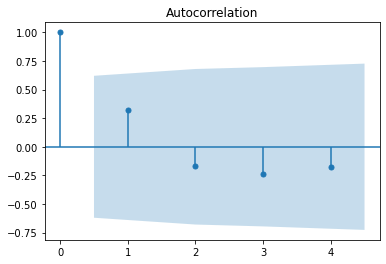

In [12]:
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation'
#lags = 4
plot_acf(df,title=title,lags=4);

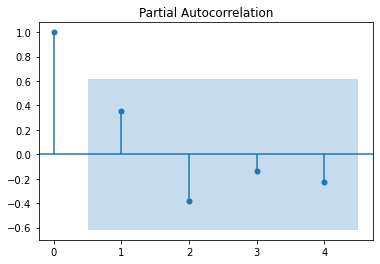

In [73]:
title='Partial Autocorrelation'
#lags=4
plot_pacf(df,title=title,lags=4);

<b>iv. Identify the pattern of ACF and its approximate model. </b>


From the ACF and PACF plot, considering SE=0.316 we can consider ARMA(1) process component and may need transformation and may not fit model well as coeffient values  not >2𝜎 dataset for applying stationary models like ARMA

<b>v. Calculate the standard error. </b>

In [14]:
import math
#print(math.sqrt(df['a'].std()))
print(1/math.sqrt(len(df['a'])))
#using formula SE=1/root(N)

0.31622776601683794


2. For the given set of data, 3.65, 8.03, 5.72, 4.93, 5.71, 4.79, 4.87, 6.48, 6.40, 6.41 [Manual Method] 

i. Identify the time series model. 

ii. Plot ACF plot for lag k=0, 1, 2, 3, 4 …. 


In [15]:
df2 =pd.DataFrame({'a':[3.65, 8.03, 5.72, 4.93, 5.71, 4.79, 4.87, 6.48, 6.40, 6.41]})
df2

,a
0,3.65
1,8.03
2,5.72
3,4.93
4,5.71
5,4.79
6,4.87
7,6.48
8,6.40
9,6.41


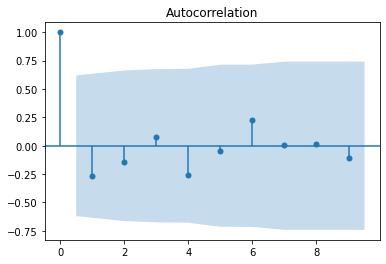

In [16]:
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation'
#lags = 4
plot_acf(df2,title=title);

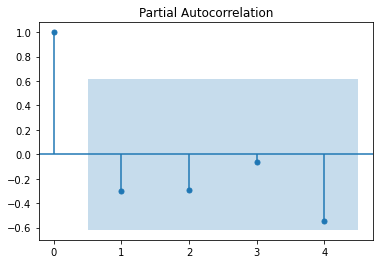

In [17]:
title='Partial Autocorrelation'
#lags=4
plot_pacf(df2,title=title,lags=4);

In [18]:
print('SE:',1/math.sqrt(len(df2['a'])))

SE: 0.31622776601683794


From the ACF and PACF plot, considering SE=0.316 may need transformation and will not fit model well as coeffient values not >3𝜎 dataset for applying stationary models

3. 𝑧(𝑡) = 0.5𝑎(𝑡 − 1) + 𝑎(𝑡) , for the given model what would be the pattern of 
ACF? [Analytical] 

# Set- T1_a.pdf

1. Follow the time series data given below, 9.47, 11.26, 10.47, 8.82, 8.90, 8.26, 8.87, 9.57, 11.31, 10.97. (Manual 
method) 


In [33]:
df3 =pd.DataFrame({'a':[9.47, 11.26, 10.47, 8.82, 8.90, 8.26, 8.87, 9.57, 11.31, 10.97]})
df3

,a
0,9.47
1,11.26
2,10.47
3,8.82
4,8.90
5,8.26
6,8.87
7,9.57
8,11.31
9,10.97


<b>i. Calculate the correlation coefficient. </b>

In [34]:
# ρ is the corrrelation coefficient (ρ= ck/c0)
arr3 = acf(df3['a'])
arr3

array([ 1.        ,  0.45307619, -0.1111852 , -0.38266416, -0.48561927,
       -0.31033938, -0.01228372,  0.27262836,  0.10951813, -0.03313094])

In [35]:
for ind,i in enumerate(arr3[:4]):
    print('\u03C1',ind,':',i)

ρ 0 : 1.0
ρ 1 : 0.45307619415295
ρ 2 : -0.11118520338328751
ρ 3 : -0.3826641631277863


<b>ii. Derive Yule-Walker equations. </b>

$\phi_0 = 1\\
\phi_1 = \rho_1 = 0.316\\
\phi_2 = \frac {\rho_2 - {\rho_1}^2} {1-{\rho_1}^2} = \frac {(-0.170) - {(0.316)}^2} {1-{(0.316)}^2}$

$\displaystyle \begin{pmatrix}\rho_0&\rho_1&\cdots &\rho_{k-1}\\
\rho_1&\rho_0&\cdots &\rho_{k-2}\\
\vdots &\vdots &\ddots &\vdots \\
\rho_{k-1}&\rho_{k-2}&\cdots &\rho_0\\
\end{pmatrix}\quad \begin{pmatrix}\phi_{k1}\\\phi_{k2}\\\vdots\\\phi_{kk}\end{pmatrix}
\mathbf = \begin{pmatrix}\rho_1\\\rho_2\\\vdots\\\rho_k\end{pmatrix}$

In [36]:
print('Coefficients of 𝜙KK given by for first 4 coefficient')
arr4 = pacf_yw(df3['a'],nlags=3,method='mle')
arr4

Coefficients of 𝜙KK given by for first 4 coefficient


array([ 1.        ,  0.45307619, -0.39820624, -0.19711439])

Substitute values for 𝜌, 𝜙KK in eqn to get Yule walker eqn , done in manual calculation for reference

<b>iii. Calculate the auto-covariance function. </b>

In [37]:
#Gamma values 𝛾𝑘=ck , first four
arr = acovf(df3['a'])
arr[:4]

array([ 1.13972,  0.51638, -0.12672, -0.43613])

<b>iii. Plot ACF and PACF. </b>

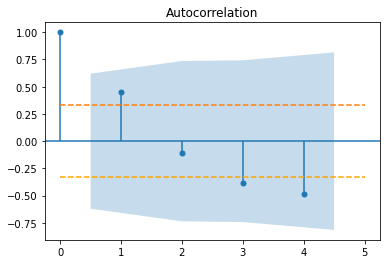

In [68]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation'
#lags = 4
plot_acf(df3,title=title,lags=4);
plt.plot([0.333 for i in range(0,6)], linestyle = 'dashed',) # SE line
plt.plot([-0.333 for i in range(0,6)], linestyle = 'dashed',color='orange')
plt.show()

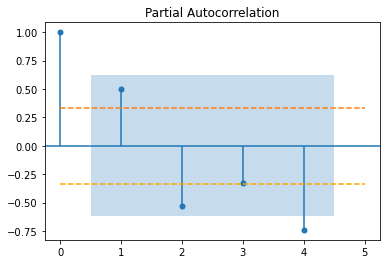

In [70]:
title='Partial Autocorrelation'
#lags=4
plot_pacf(df3,title=title,lags=4);
plt.plot([0.333 for i in range(0,6)], linestyle = 'dashed',) # SE line
plt.plot([-0.333 for i in range(0,6)], linestyle = 'dashed',color='orange')
plt.show()

In [67]:
print('SE:',1/math.sqrt(len(df3['a'])-1))

SE: 0.3333333333333333


<b>iv. Identify the pattern of ACF and its approximate model. </b>

In ACF we observe k=1, component is above SE=0.333, we can consider MA(q=1) and AR(p=1, or 2) but since it is less than >3𝜎
may need transformation and will not fit stationary model well

<b>v. Calculate the standard error<b>

In [76]:
print('SE:',1/math.sqrt(len(df3['a'])-1))

SE: 0.3333333333333333


<b>2. For the given set of data, 1.174, 0.13, -0.66, -1.48, 0.15, 0.82, -0.29, 0.54, -0.31, -1.096. [Manual Method]

i. Identify the time series model. 

ii. Plot ACF plot for lag k=0, 1, 2, 3, 4 …. 
<b>

In [77]:
df4 =pd.DataFrame({'a':[1.174, 0.13, -0.66, -1.48, 0.15, 0.82, -0.29, 0.54, -0.31, -1.096]})
df4

,a
0,1.174
1,0.130
2,-0.660
3,-1.480
4,0.150
5,0.820
6,-0.290
7,0.540
8,-0.310
9,-1.096


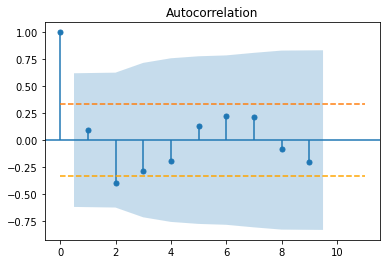

In [84]:
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation'
#lags = 4
plot_acf(df4,title=title);
plt.plot([0.333 for i in range(0,12)], linestyle = 'dashed',) # SE line
plt.plot([-0.333 for i in range(0,12)], linestyle = 'dashed',color='orange')

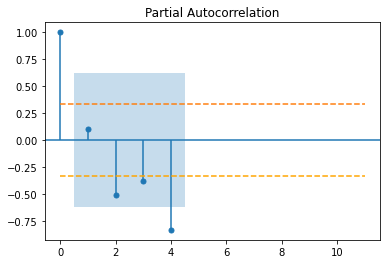

In [85]:
title='Partial Autocorrelation'
#lags=4
plot_pacf(df4,title=title,lags=4);
plt.plot([0.333 for i in range(0,12)], linestyle = 'dashed',) # SE line
plt.plot([-0.333 for i in range(0,12)], linestyle = 'dashed',color='orange')

In [81]:
print('SE:',1/math.sqrt(len(df4['a'])-1))

SE: 0.3333333333333333


In ACF and PACF graph we see that there is no MA or AR component, may need stationary test as ADF to check and apply 
transformation like ARIMA

In [15]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_excel('data.xlsx',index_col=0, parse_dates=True)

In [11]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [16]:
print('Augmented Dickey-Fuller Test on Daily Female Births')
dftest = adfuller(df['data'],autolag='AIC')
dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

Augmented Dickey-Fuller Test on Daily Female Births
ADF test statistic      -2.723831
p-value                  0.070004
# lags used              0.000000
# observations          15.000000
critical value (1%)     -3.964443
critical value (5%)     -3.084908
critical value (10%)    -2.681814
dtype: float64


In [17]:
adf_test(df['data'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -2.723831
p-value                  0.070004
# lags used              0.000000
# observations          15.000000
critical value (1%)     -3.964443
critical value (5%)     -3.084908
critical value (10%)    -2.681814
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [19]:
from statsmodels.tsa.stattools import q_stat

In [25]:
q_stat(acf(df['data']),nobs=16)

(array([19.2       , 27.63908119, 31.57792311, 33.76256121, 33.77476274,
        34.09426533, 34.60546946, 35.38825079, 36.55671738, 38.28203134,
        40.83805201, 44.70403327, 50.11744564, 54.88357923, 61.98551434,
                inf]),
 array([1.17713391e-05, 9.95978071e-07, 6.42281372e-07, 8.33588287e-07,
        2.63989972e-06, 6.45122454e-06, 1.32647281e-05, 2.27168044e-05,
        3.15691309e-05, 3.38918628e-05, 2.56967950e-05, 1.15800806e-05,
        2.84626718e-06, 9.06578185e-07, 1.14559168e-07, 0.00000000e+00]))

In [26]:
acf([
16272.01,
16472.37,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43,
16776.43
])

array([ 1.        ,  0.44432998, -0.0044679 , -0.00670185, -0.00893581,
       -0.01116976, -0.01340371, -0.01563766, -0.01787161, -0.02010556,
       -0.02233951, -0.02457346, -0.02680742, -0.02904137, -0.03127532,
       -0.03350927, -0.03574322, -0.03797717, -0.04021112, -0.04244508,
       -0.04467903, -0.04691298, -0.04914693, -0.05138088, -0.05361483,
       -0.05584878, -0.05808273, -0.06031669, -0.06255064, -0.03957969])